In [1]:
import string
import re
import os
import nltk
import pandas as pd
import numpy as np
import json
import glob
import gzip
import tensorflow as tf
from tensorflow import keras
import time

import matplotlib.pyplot as plt

SEED = 1013
np.random.seed(SEED)

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


import pandas as pd 
import numpy as np 
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy import sparse
import os
import pickle
import emoji
from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.util import ngrams

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer

Using TensorFlow backend.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Meghna/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import collections
df = pd.read_csv('/Users/Meghna/Desktop/human_annotated_black_tweets.csv')
dff = pd.read_csv('/Users/Meghna/Desktop/human_annotated_black_tweets2.csv')
dfff = pd.read_csv('/Users/Meghna/Desktop/human_annotated_nonblack_tweets.csv')

In [333]:
races = df['race'].to_list()
count = 0
for val in races:
    if val == 1:
        count += 1
print(count)
df.head()

18602


Unnamed: 0  race  \
0           0     0   
1           1     1   
2           2     0   
3           3     0   
4           4     1   

                                                                                                                                                                                                                                                                                                                  tweet  \
0                                                                                              And on the first day of the Colorado legislature’s special session, we learn a Republican staffer who tested positive for COVID-19 last week still attended today’s session. https://t.co/MxeCHYiMgN via @BenteBirkeland   
1                                                                                                                                                                                                                                    Everyone needs to read this. Dr. Nichols and his co-workers/ co-heros are amazing!   
2                                                                                                                                                                                                                                                 “He would make outrageous claims like he invented the question mark.”   
3  @holynext SUGAR AND COVID\nDiabetes is a target, we eat too much sugar.\nBIG USA1988 years 6.2 million diabetes were NOT COVID\n2019 year 33.3 million diabetes, cost $ 330 billion. IS  COVID\nSMALL HUNGARY In 2013, 700,000 diabetes  NOT COVID\nIn 2020, 1.3 million diabetes  IS COVID. https://t.co/RCQf1huwJM   
4                                                                                                                                                                   I’m all for compromise - just do not give in on the liability issue - companies must be accountable if they fail to provide safe work environments.   

      user_id  
0   195850342  
1    15584648  
2    50961846  
3  4892104205  
4  2335952028

In [3]:
races = df['race'].to_list() + dff['race'].to_list() + dfff['race'].to_list()
tweets = df['tweet'].to_list() + dff['tweet'].to_list() + dfff['tweet'].to_list()

In [4]:
print(len(races))

6822


In [335]:
final_races = []
final_tweets = []
count_aa = 0
count_other = 0
count = 0
for i in range(len(races)):
    #if races[i] == 1 and count_aa < 49015 and count < 98030:
    #if races[i] == 1 and count_aa <6554  and count < 13108:
    if races[i] == 1 and count_aa <18602  and count < 37204:
        final_races.append(races[i])
        final_tweets.append(tweets[i])
        count_aa += 1
        count += 1
    #elif races[i] == 0 and count_other < 49015 and count < 98030:
    #elif races[i] == 0 and count_other < 6554  and count < 13108:
    elif races[i] == 0 and count_other < 18602  and count < 37204:
        final_races.append(races[i])
        final_tweets.append(tweets[i])
        count_other += 1
        count += 1
    

In [336]:
counting = 0
counting2 = 0
for val in final_races:
    if val == 1:
        counting += 1
    else:
        counting2 += 1
print(counting, counting2)

18602 18602


In [5]:
new_df = pd.DataFrame()
# new_df['races'] = pd.Series(final_races)
# new_df['tweets'] = pd.Series(final_tweets)

new_df['races'] = pd.Series(races)
new_df['tweets'] = pd.Series(tweets)


#new_df.to_csv('/Users/Meghna/Desktop/tweets_for_language_model_noRT.csv')

In [7]:
#tweets_box_plot = [len(t) for t in final_tweets]
tweets_box_plot = [len(t) for t in tweets]

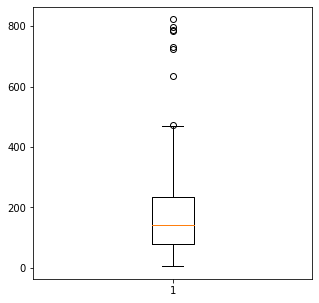

In [8]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(tweets_box_plot)
plt.show()

In [340]:
print(final_tweets[10])

Covid in the U.S.: Latest Map and Case Count https://t.co/HP3WALVn8e


In [341]:
print(len(final_tweets))
print(len(set(final_tweets)))
print(len(final_races))

37204
36774
37204


In [342]:
pd.set_option('display.max_colwidth', None)
df1 = pd.DataFrame(columns=['text','label'])
df1['text'] =  final_tweets
df1['label'] = final_races
df1['pre_clean_len'] = [len(t) for t in df1.text]
df1[df1.pre_clean_len > 280]

text  \
3                                                                   @holynext SUGAR AND COVID\nDiabetes is a target, we eat too much sugar.\nBIG USA1988 years 6.2 million diabetes were NOT COVID\n2019 year 33.3 million diabetes, cost $ 330 billion. IS  COVID\nSMALL HUNGARY In 2013, 700,000 diabetes  NOT COVID\nIn 2020, 1.3 million diabetes  IS COVID. https://t.co/RCQf1huwJM   
7                                                                              @ErminioAdoranti @SeanBradbery TRUMP believes that covid is being used in a hoax fashion.  Trump had covid. He knows it’s real.  But the Dems are using covid as a weapon to hurt businesses, to fear monger and control us. That’s what communism does to its people. Rule by fear. Take from the people   
21                                                                                @aaronmilller @MJGosper @Laura1075 @BethAGraham @JoeBiden While 200k deaths are ‘attributed’ to COVID out of the 300k excess deaths, as the study makes plain for many reasons the reported number of deaths may substantially under-count deaths that were caused by COVID\n\nhttps://t.co/LwEOxT0Daj   
30                                                                                  @LauraCTaylor80 Similar, but the Boots one contains Carragelose (Vicks has a different active ingredient) which reduces the symptoms linked to the Covid family of infections, or in some cases prevents them completely. \nTake a couple of tokes at the first sign of a cold and it works wonders!   
38                                                                                       Giving Tuesday in Belmont-Cragin #chicago #donate #givingtuesday #literacy #COVID19 #community #smallorganization #ladieswholunch #lasdamas\n\nPlease donate to our community organization https://t.co/Vb9RbRPPzm\n\nhttps:://www.paypal.com/biz/fund?id=XARXXN4HNKKB6 https://t.co/R9lWfB5tV2   
...                                                                                                                                                                                                                                                                                                                                                                                  ...   
37129                                                         @TeamTrump @realDonaldTrump @KLoeffler Bullshit. She paid $1.0M for her Senate seat.\n\n$550M net worth \n5 homes \n$25M jet\n\nInsider trading from Senate floor, made money off pandemic.\n\nShe's NO champion for anyone but herself and other wealthy people.\n\nGeorgians are not stupid people: they voted YOU out!!   
37146                                                                                    Trouble of having author copies of your books delivered during a Xmas pandemic is you’re never sure\nA) if it’s a gift from a family member \nB) a gift to be wrapped &amp; sent, or \nC) your life’s work!\n#theboyiam #unboxing #ukya\n@LittleTigerUK @charlieinabook https://t.co/Eas0PkGhrG   
37156                                    @teacherVOL @JRClemmons @GovBillLee @SekouFranklin @TNLookout By contrast, I accept that homeschooling will likely always be minority practice.  People love free childcare.  I gave seventeen years to the public school system.  I see the source of your animus as rooted in your professional dislike of those who question public schools.   
37174                                                                           @jackdecmich It’s an mRNA vaccine, which is supposed to add a synthetic form of RNA into the body to activate proteins to combat this virus. Yet nobody has ever done this on humans before, we don’t know the side effects, and RNA is genetic material. They are trying to alter us GENETICALLY. 🙅🏾‍♀️   
37180  @PemaKhanduBJP @PMOIndia @narendramodi @MoHFW_INDIA @drharshvardhan @DirectorateofHS @libang_alo Yes, the increase of bacterial respiratory infections from the prolonged wearing of mask

In [9]:
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    stripped = re.sub(r'\@w+','',stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [10]:
# train_data = []
# for data in final_tweets:
#     train_data.append(tweet_cleaner_updated(data))
    
# train_labels = final_races

train_data = []
for data in tweets:
    train_data.append(tweet_cleaner_updated(data))
    
train_labels = races

In [11]:
tweets_box_plot2 = [len(t) for t in train_data]
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(tweets_box_plot2)
plt.show()

In [12]:
df = pd.DataFrame(columns=['text','label'])

df['text'] = train_data
df['label'] = train_labels

df0 = df[df["label"] == 0] 
df1 = df[df["label"] == 1]


In [13]:
neg_tweets = df[df.label == 0]
neg_string = []
for t in neg_tweets.text:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
pos_tweets = df[df.label == 1]
pos_string = []
for t in pos_tweets.text:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string) 
plt.figure(figsize=(12,10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis("off") 
plt.show()

In [15]:
cvec = CountVectorizer()
cvec.fit(df.text)

CountVectorizer()

In [16]:
len(cvec.get_feature_names())

13251

In [17]:
for val in cvec.get_feature_names():
    if 'black' in val or 'africa' in val:
        print(val)

africa
african
black
blackandwhitephotography
blackdesigner
blackfriday
blackfridaydeals
blackfridaysales
blackgirlgardener
blacklist
blacklivesmatter
blacklove
blackluv
blackownedbusiness
blackpool
blacks
blackwomeninmedicine
fellowsouthafricans
southafrica


In [18]:
neg_doc_matrix = cvec.transform(df[df.label == 0].text)
pos_doc_matrix = cvec.transform(df[df.label == 1].text)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))
term_freq_df = pd.DataFrame([neg,pos],columns=cvec.get_feature_names()).transpose()

In [19]:
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:-50]

negative  positive  total
the              3167      2818   5985
to               2149      2365   4514
and              1640      1487   3127
covid            1316      1507   2823
of               1488      1202   2690
...               ...       ...    ...
infertility         0         1      1
infiltrated         0         1      1
inflame             0         1      1
ineptitudes         0         1      1
ineptitude          1         0      1

[13201 rows x 3 columns]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=13251)
cvec.fit(df.text)

CountVectorizer(max_features=13251, stop_words='english')

In [21]:
document_matrix = cvec.transform(df.text)

In [22]:
neg_doc_matrix2 = cvec.transform(df[df.label == 0].text)
pos_doc_matrix2 = cvec.transform(df[df.label == 1].text)
neg_tf2 = np.sum(neg_doc_matrix2,axis=0)
pos_tf2 = np.sum(pos_doc_matrix2,axis=0)
neg2 = np.squeeze(np.asarray(neg_tf2))
pos2 = np.squeeze(np.asarray(pos_tf2))
term_freq_df2 = pd.DataFrame([neg2,pos2],columns=cvec.get_feature_names()).transpose()
term_freq_df2.columns = ['negative', 'positive']
term_freq_df2['total'] = term_freq_df2['negative'] + term_freq_df2['positive']
term_freq_df2.sort_values(by='total', ascending=False).iloc[:30]

negative  positive  total
covid            1316      1507   2823
pandemic          476       487    963
vaccine           433       382    815
people            364       367    731
just              220       340    560
like              154       225    379
coronavirus       180       199    379
work              173       192    365
help              163       156    319
mask              143       176    319
need              147       156    303
new               121       173    294
time              139       154    293
year              169        98    267
home              135       124    259
know              141       118    259
going              99       155    254
ve                134       103    237
good              121       114    235
trump             135        97    232
christmas         110       120    230
lockdown          158        72    230
really            154        72    226
virus             143        83    226
cases              99       126    225
don                99       123    222
health            122        99    221
right             114       105    219
want               95       118    213
wear               92       117    209

In [23]:
import seaborn as sns
plt.figure(figsize=(8,6))
ax = sns.regplot(x="negative", y="positive",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency')
plt.xlabel('Negative Frequency')
plt.title('Negative Frequency vs Positive Frequency')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0.5, 1.0, 'Negative Frequency vs Positive Frequency')

In [24]:
term_freq_df2['pos_rate'] = term_freq_df2['positive'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='pos_rate', ascending=False).iloc[:10]

negative  positive  total  pos_rate
rouse             0         1      1       1.0
crib              0         1      1       1.0
sprees            0         1      1       1.0
springs           0         1      1       1.0
reviewing         0         3      3       1.0
spurs             0         1      1       1.0
cruces            0         1      1       1.0
ims               0         1      1       1.0
twerking          0        13     13       1.0
polls             0         1      1       1.0

In [25]:
term_freq_df2['neg_rate'] = term_freq_df2['negative'] * 1./term_freq_df2['total']
term_freq_df2.sort_values(by='neg_rate', ascending=False).iloc[:10]

negative  positive  total  pos_rate  neg_rate
aa                   1         0      1       0.0       1.0
legitimate           1         0      1       0.0       1.0
leverage             1         0      1       0.0       1.0
letters              2         0      2       0.0       1.0
lets                 6         0      6       0.0       1.0
lestweforget         1         0      1       0.0       1.0
lessons              6         0      6       0.0       1.0
lesser               1         0      1       0.0       1.0
lesen                2         0      2       0.0       1.0
lending              1         0      1       0.0       1.0

In [26]:
term_freq_df2['pos_freq_pct'] = term_freq_df2['positive'] * 1./term_freq_df2['positive'].sum()
term_freq_df2.sort_values(by='pos_freq_pct', ascending=False).iloc[:10]

negative  positive  total  pos_rate  neg_rate  pos_freq_pct
covid            1316      1507   2823  0.533829  0.466171      0.039538
pandemic          476       487    963  0.505711  0.494289      0.012777
vaccine           433       382    815  0.468712  0.531288      0.010022
people            364       367    731  0.502052  0.497948      0.009629
just              220       340    560  0.607143  0.392857      0.008920
like              154       225    379  0.593668  0.406332      0.005903
coronavirus       180       199    379  0.525066  0.474934      0.005221
work              173       192    365  0.526027  0.473973      0.005037
mask              143       176    319  0.551724  0.448276      0.004618
new               121       173    294  0.588435  0.411565      0.004539

In [27]:
term_freq_df2['neg_freq_pct'] = term_freq_df2['negative'] * 1./term_freq_df2['negative'].sum()
term_freq_df2.sort_values(by='neg_freq_pct', ascending=False).iloc[:10]

negative  positive  total  pos_rate  neg_rate  pos_freq_pct  \
covid            1316      1507   2823  0.533829  0.466171      0.039538   
pandemic          476       487    963  0.505711  0.494289      0.012777   
vaccine           433       382    815  0.468712  0.531288      0.010022   
people            364       367    731  0.502052  0.497948      0.009629   
just              220       340    560  0.607143  0.392857      0.008920   
coronavirus       180       199    379  0.525066  0.474934      0.005221   
work              173       192    365  0.526027  0.473973      0.005037   
year              169        98    267  0.367041  0.632959      0.002571   
help              163       156    319  0.489028  0.510972      0.004093   
lockdown          158        72    230  0.313043  0.686957      0.001889   

             neg_freq_pct  
covid            0.032233  
pandemic         0.011659  
vaccine          0.010605  
people           0.008915  
just             0.005388  
coronavirus      0.004409  
work             0.004237  
year             0.004139  
help             0.003992  
lockdown         0.003870

In [28]:
from scipy.stats import hmean

term_freq_df2['pos_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['pos_rate'], x['pos_freq_pct']])
                                                                   if x['pos_rate'] > 0 and x['pos_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2.sort_values(by='pos_hmean', ascending=False).iloc[:10]

negative  positive  total  pos_rate  neg_rate  pos_freq_pct  \
covid            1316      1507   2823  0.533829  0.466171      0.039538   
pandemic          476       487    963  0.505711  0.494289      0.012777   
vaccine           433       382    815  0.468712  0.531288      0.010022   
people            364       367    731  0.502052  0.497948      0.009629   
just              220       340    560  0.607143  0.392857      0.008920   
like              154       225    379  0.593668  0.406332      0.005903   
coronavirus       180       199    379  0.525066  0.474934      0.005221   
work              173       192    365  0.526027  0.473973      0.005037   
mask              143       176    319  0.551724  0.448276      0.004618   
new               121       173    294  0.588435  0.411565      0.004539   

             neg_freq_pct  pos_hmean  
covid            0.032233   0.073624  
pandemic         0.011659   0.024925  
vaccine          0.010605   0.019625  
people           0.008915   0.018895  
just             0.005388   0.017582  
like             0.003772   0.011690  
coronavirus      0.004409   0.010339  
work             0.004237   0.009979  
mask             0.003502   0.009159  
new              0.002964   0.009008

In [29]:
term_freq_df2['neg_hmean'] = term_freq_df2.apply(lambda x: (hmean([x['neg_rate'], x['neg_freq_pct']])
                                                                   if x['neg_rate'] > 0 and x['neg_freq_pct'] > 0 
                                                                   else 0), axis=1)                                                        
term_freq_df2.sort_values(by='neg_hmean', ascending=False).iloc[:10]

negative  positive  total  pos_rate  neg_rate  pos_freq_pct  \
covid            1316      1507   2823  0.533829  0.466171      0.039538   
pandemic          476       487    963  0.505711  0.494289      0.012777   
vaccine           433       382    815  0.468712  0.531288      0.010022   
people            364       367    731  0.502052  0.497948      0.009629   
just              220       340    560  0.607143  0.392857      0.008920   
coronavirus       180       199    379  0.525066  0.474934      0.005221   
work              173       192    365  0.526027  0.473973      0.005037   
year              169        98    267  0.367041  0.632959      0.002571   
help              163       156    319  0.489028  0.510972      0.004093   
lockdown          158        72    230  0.313043  0.686957      0.001889   

             neg_freq_pct  pos_hmean  neg_hmean  
covid            0.032233   0.073624   0.060296  
pandemic         0.011659   0.024925   0.022780  
vaccine          0.010605   0.019625   0.020796  
people           0.008915   0.018895   0.017517  
just             0.005388   0.017582   0.010631  
coronavirus      0.004409   0.010339   0.008736  
work             0.004237   0.009979   0.008399  
year             0.004139   0.005107   0.008225  
help             0.003992   0.008118   0.007923  
lockdown         0.003870   0.003755   0.007696

In [30]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())
term_freq_df2['pos_rate_normcdf'] = normcdf(term_freq_df2['pos_rate'])
term_freq_df2['pos_freq_pct_normcdf'] = normcdf(term_freq_df2['pos_freq_pct'])
term_freq_df2['pos_normcdf_hmean'] = hmean([term_freq_df2['pos_rate_normcdf'], term_freq_df2['pos_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:10]

negative  positive  total  pos_rate  neg_rate  pos_freq_pct  \
aunt                   1        52     53  0.981132  0.018868      0.001364   
recovering             1        51     52  0.980769  0.019231      0.001338   
deserves               2        54     56  0.964286  0.035714      0.001417   
pltcybermonday         4        94     98  0.959184  0.040816      0.002466   
diagnosed              3        52     55  0.945455  0.054545      0.001364   
cure                   2        38     40  0.950000  0.050000      0.000997   
autistic               0        30     30  1.000000  0.000000      0.000787   
custody                0        30     30  1.000000  0.000000      0.000787   
blessing               1        31     32  0.968750  0.031250      0.000813   
treat                  8        58     66  0.878788  0.121212      0.001522   

                neg_freq_pct  pos_hmean  neg_hmean  pos_rate_normcdf  \
aunt                0.000024   0.002725   0.000049          0.901375   
recovering          0.000024   0.002672   0.000049          0.901222   
deserves            0.000049   0.002829   0.000098          0.894105   
pltcybermonday      0.000098   0.004920   0.000195          0.891829   
diagnosed           0.000073   0.002725   0.000147          0.885529   
cure                0.000049   0.001992   0.000098          0.887643   
autistic            0.000000   0.001573   0.000000          0.909075   
custody             0.000000   0.001573   0.000000          0.909075   
blessing            0.000024   0.001625   0.000049          0.896068   
treat               0.000196   0.003038   0.000391          0.851239   

                pos_freq_pct_normcdf  pos_normcdf_hmean  
aunt                        0.997676           0.947084  
recovering                  0.997221           0.946794  
deserves                    0.998390           0.943374  
pltcybermonday              1.000000           0.942822  
diagnosed                   0.997676           0.938263  
cure                        0.978451           0.930837  
autistic                    0.940762           0.924647  
custody                     0.940762           0.924647  
blessing                    0.947265           0.920956  
treat                       0.999255           0.919327

In [95]:
from scipy.stats import norm
def normcdf(x):
    return norm.cdf(x, x.mean(), x.std())

term_freq_df2['neg_rate_normcdf'] = normcdf(term_freq_df2['neg_rate'])
term_freq_df2['neg_freq_pct_normcdf'] = normcdf(term_freq_df2['neg_freq_pct'])
term_freq_df2['neg_normcdf_hmean'] = hmean([term_freq_df2['neg_rate_normcdf'], term_freq_df2['neg_freq_pct_normcdf']])
term_freq_df2.sort_values(by='pos_normcdf_hmean', ascending=False).iloc[:20]

negative  positive  total  pos_rate  neg_rate  pos_freq_pct  \
aunt                   1        52     53  0.981132  0.018868      0.001364   
recovering             1        51     52  0.980769  0.019231      0.001338   
deserves               2        54     56  0.964286  0.035714      0.001417   
pltcybermonday         4        94     98  0.959184  0.040816      0.002466   
diagnosed              3        52     55  0.945455  0.054545      0.001364   
cure                   2        38     40  0.950000  0.050000      0.000997   
autistic               0        30     30  1.000000  0.000000      0.000787   
custody                0        30     30  1.000000  0.000000      0.000787   
blessing               1        31     32  0.968750  0.031250      0.000813   
treat                  8        58     66  0.878788  0.121212      0.001522   
mom                    6        44     50  0.880000  0.120000      0.001154   
jobless                4        35     39  0.897436  0.102564      0.000918   
nephew                 2        30     32  0.937500  0.062500      0.000787   
freedom                4        34     38  0.894737  0.105263      0.000892   
direct                 3        31     34  0.911765  0.088235      0.000813   
type                   6        36     42  0.857143  0.142857      0.000945   
speak                  4        31     35  0.885714  0.114286      0.000813   
crazy                  9        43     52  0.826923  0.173077      0.001128   
winning                1        25     26  0.961538  0.038462      0.000656   
black                  9        41     50  0.820000  0.180000      0.001076   

                neg_freq_pct  pos_hmean  neg_hmean  pos_rate_normcdf  \
aunt                0.000024   0.002725   0.000049          0.901375   
recovering          0.000024   0.002672   0.000049          0.901222   
deserves            0.000049   0.002829   0.000098          0.894105   
pltcybermonday      0.000098   0.004920   0.000195          0.891829   
diagnosed           0.000073   0.002725   0.000147          0.885529   
cure                0.000049   0.001992   0.000098          0.887643   
autistic            0.000000   0.001573   0.000000          0.909075   
custody             0.000000   0.001573   0.000000          0.909075   
blessing            0.000024   0.001625   0.000049          0.896068   
treat               0.000196   0.003038   0.000391          0.851239   
mom                 0.000147   0.002306   0.000294          0.851918   
jobless             0.000098   0.001835   0.000196          0.861457   
nephew              0.000049   0.001573   0.000098          0.881762   
freedom             0.000098   0.001782   0.000196          0.860008   
direct              0.000073   0.001625   0.000147          0.868976   
type                0.000147   0.001887   0.000294          0.838762   
speak               0.000098   0.001625   0.000196          0.855092   
crazy               0.000220   0.002253   0.000440          0.820233   
winning             0.000024   0.001311   0.000049          0.892884   
black               0.000220   0.002149   0.000440          0.815807   

                pos_freq_pct_normcdf  pos_normcdf_hmean  neg_rate_normcdf  \
aunt                        0.997676           0.947084          0.098625   
recovering                  0.997221           0.946794          0.098778   
deserves                    0.998390           0.943374          0.105895   
pltcybermonday              1.000000           0.942822          0.108171   
diagnosed                   0.997676           0.938263          0.114471   
cure                        0.978451           0.930837          0.112357   
autistic                    0.940762           0.924647          0.090925   
custody                     0.940762           0.924647          0.090925   
blessing                    0.947265           0.920956          0.103932   
treat                       0.999255           0.919327          0.148761

Text(0.5, 1.0, 'neg_freq_pct vs pos_freq_pct')

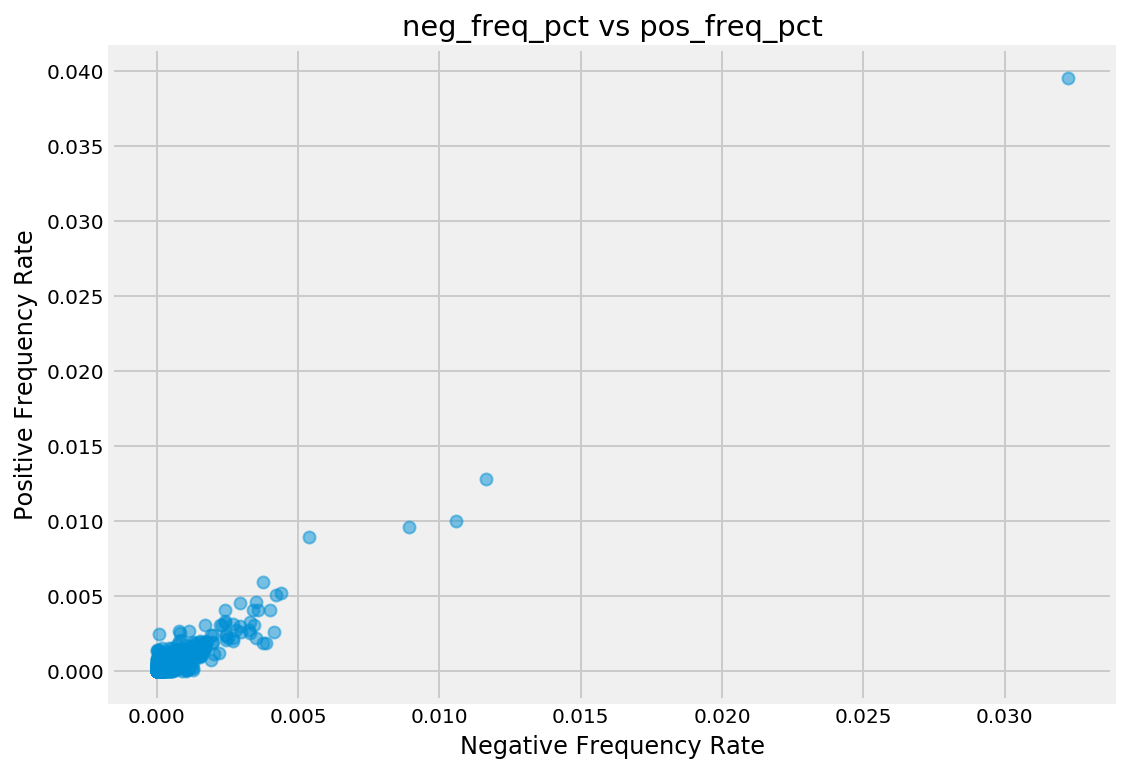

In [32]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_freq_pct", y="pos_freq_pct",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Frequency Rate')
plt.xlabel('Negative Frequency Rate')
plt.title('neg_freq_pct vs pos_freq_pct')

Text(0.5, 1.0, 'neg_hmean vs pos_hmean')

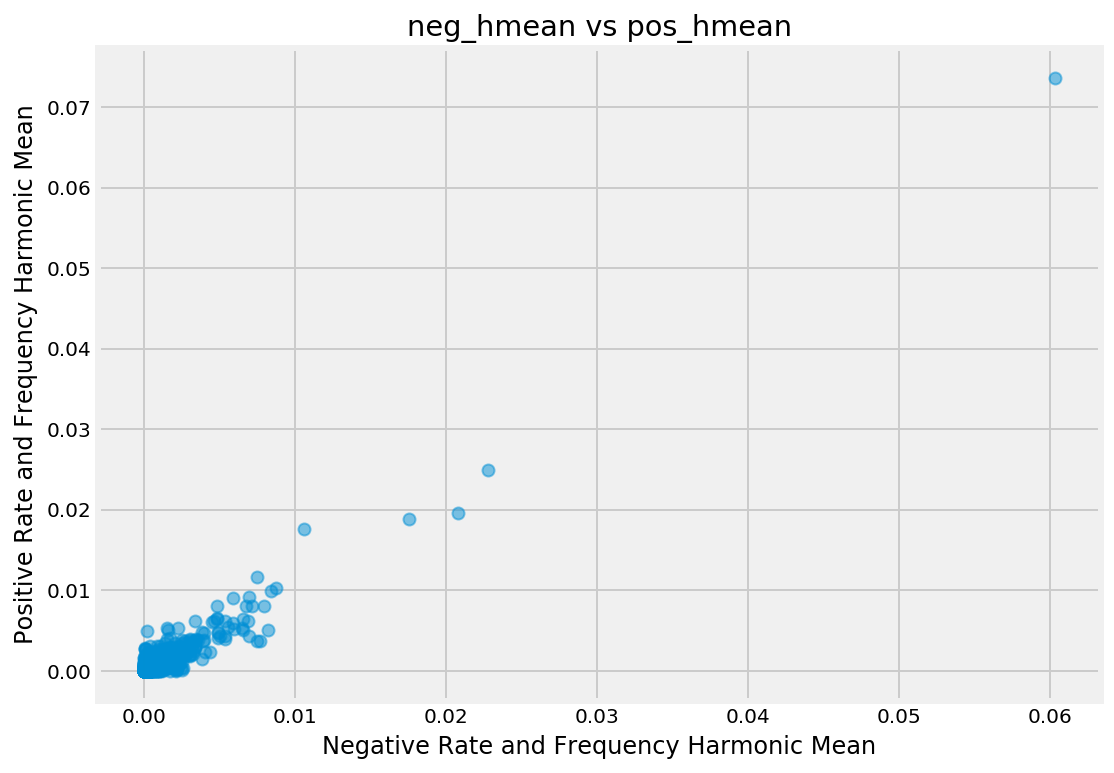

In [33]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_hmean", y="pos_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency Harmonic Mean')
plt.xlabel('Negative Rate and Frequency Harmonic Mean')
plt.title('neg_hmean vs pos_hmean')

Text(0.5, 1.0, 'neg_normcdf_hmean vs pos_normcdf_hmean')

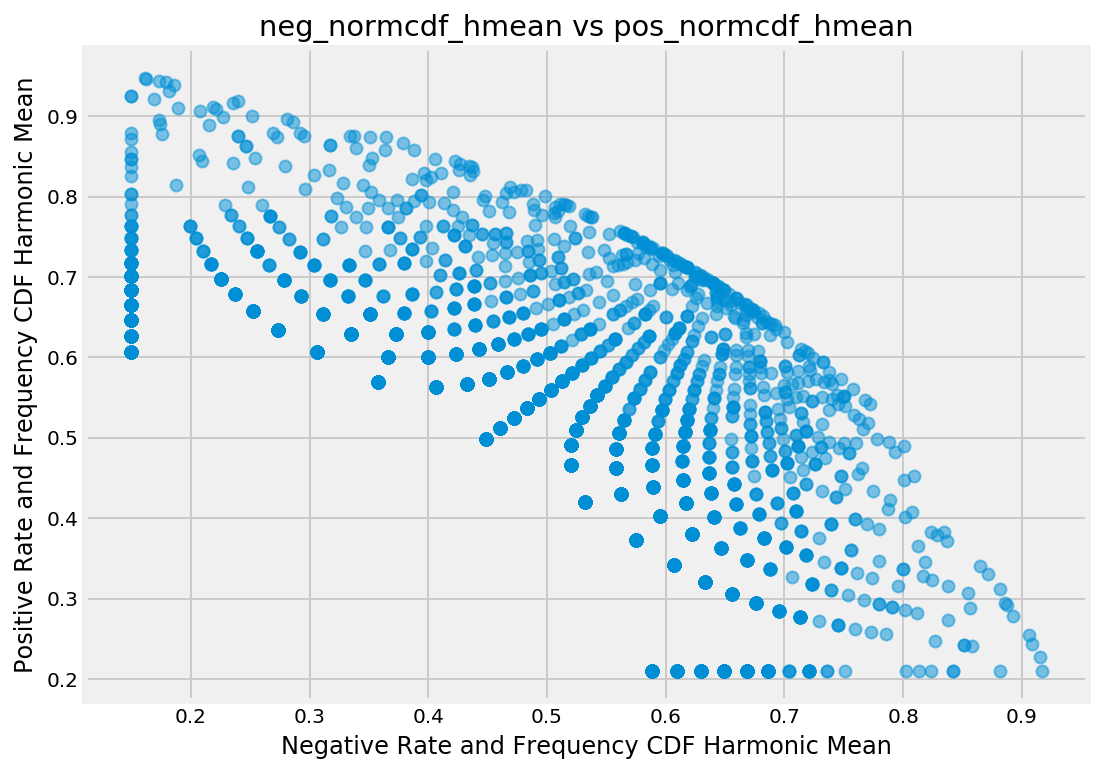

In [34]:
plt.figure(figsize=(8,6))
ax = sns.regplot(x="neg_normcdf_hmean", y="pos_normcdf_hmean",fit_reg=False, scatter_kws={'alpha':0.5},data=term_freq_df2)
plt.ylabel('Positive Rate and Frequency CDF Harmonic Mean')
plt.xlabel('Negative Rate and Frequency CDF Harmonic Mean')
plt.title('neg_normcdf_hmean vs pos_normcdf_hmean')

In [35]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show
from bokeh.models import LinearColorMapper
output_notebook()
from bokeh.resources import INLINE
import bokeh.io


color_mapper = LinearColorMapper(palette='Inferno256', low=min(term_freq_df2.pos_normcdf_hmean), high=max(term_freq_df2.pos_normcdf_hmean))
p = figure(x_axis_label='neg_normcdf_hmean', y_axis_label='pos_normcdf_hmean')
p.circle('neg_normcdf_hmean','pos_normcdf_hmean',size=5,alpha=0.3,source=term_freq_df2,color={'field': 'pos_normcdf_hmean', 'transform': color_mapper})
from bokeh.models import HoverTool
hover = HoverTool(tooltips=[('token','@index')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

In [36]:
train_corpus,test_corpus,train_labels,test_labels = train_test_split(train_data,train_labels,stratify=train_labels,test_size=0.25,random_state=1)
train_texts, train_labels, test_texts, test_labels = train_corpus, train_labels, test_corpus, test_labels
x_train, y_train, x_validation, y_validation = train_corpus,train_labels,test_corpus,test_labels

In [37]:
y_train_len0 = 0
y_train_len1 = 1
for label in y_train:
    if label == 1:
        y_train_len1 += 1
    else:
        y_train_len0 += 1
        
y_val_len0 = 0
y_val_len1 = 0
for label in y_validation:
    if label == 1:
        y_val_len1 += 1
    else:
        y_val_len0 += 1

In [38]:
print( "Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_train),
                                                                             (y_train_len0 / (len(x_train)*1.))*100,
                                                                            (y_train_len1 / (len(x_train)*1.))*100))
       
                                                                            
print("Validation set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(x_validation),
                                                                             (y_val_len0 / (len(x_validation)))*100,
                                                                            (y_val_len1 / (len(x_validation)))*100))

Train set has total 5116 entries with 50.00% negative, 50.02% positive
Validation set has total 1706 entries with 50.00% negative, 50.00% positive


In [39]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    if y_val_len0 / (len(x_test)*1.) > 0.5:
        null_accuracy =  y_val_len1/ (len(x_test)*1.)
    else:
        null_accuracy = 1. - (y_val_len1 / (len(x_test)*1.))
    #t0 = time.time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    #train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    #print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
cvec = CountVectorizer()
lr = LogisticRegression(max_iter=200)
n_features = np.arange(1000,13001,1000)

def nfeature_accuracy_checker(vectorizer=cvec, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=lr):
    result = []
    print (classifier)
    print ("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Validation result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_validation, y_validation)
        result.append((n,nfeature_accuracy))
    return result

In [58]:
from sklearn.feature_extraction import text
z = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[:3].index))
c = frozenset(list(term_freq_df.sort_values(by='total', ascending=False).iloc[4:11].index))
listofsets = [z,c]
a = frozenset.union(*listofsets)
b = text.ENGLISH_STOP_WORDS
set(a).issubset(set(b))

True

In [59]:
my_stop_words = a

In [60]:
print("RESULT FOR UNIGRAM WITHOUT STOP WORDS\n")
feature_result_wosw = nfeature_accuracy_checker(stop_words='english')

RESULT FOR UNIGRAM WITHOUT STOP WORDS

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 58.85%
model is 8.85% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 59.44%
model is 9.44% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 59.96%
model is 9.96% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 60.32%
model is 10.32% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 61.66%
mode

In [61]:
print("RESULT FOR UNIGRAM WITH STOP WORDS\n")
feature_result_ug = nfeature_accuracy_checker()

RESULT FOR UNIGRAM WITH STOP WORDS

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 60.73%
model is 10.73% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 61.25%
model is 11.25% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.61%
model is 11.61% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.84%
model is 11.84% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 61.08%
mode

In [62]:
print("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)\n")
feature_result_wocsw = nfeature_accuracy_checker(stop_words=my_stop_words)

RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Top 10 frequent words)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 60.67%
model is 10.67% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 62.02%
model is 12.02% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.25%
model is 11.25% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 62.54%
model is 12.54% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


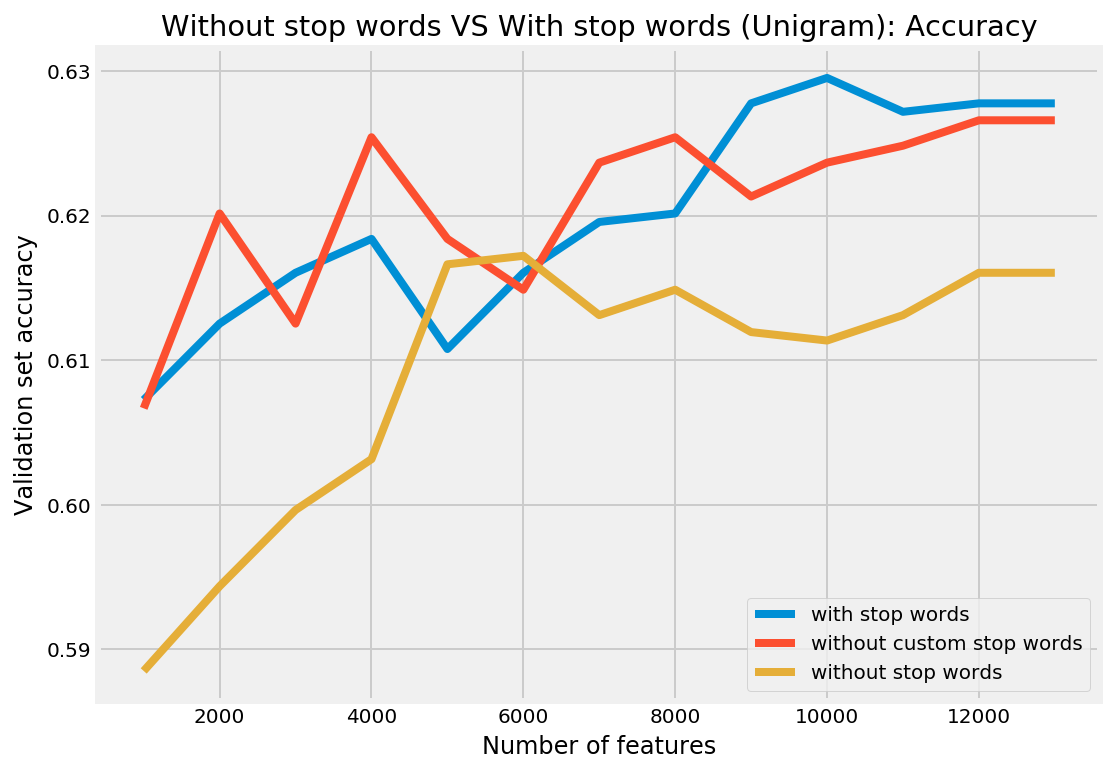

In [63]:
nfeatures_plot_ug = pd.DataFrame(feature_result_ug,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ug_wocsw = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ug_wosw = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='with stop words')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy,label='without custom stop words')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy,label='without stop words')
plt.title("Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [64]:
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg = nfeature_accuracy_checker(stop_words=my_stop_words,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 59.20%
model is 9.20% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 59.73%
model is 9.73% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.43%
model is 11.43% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.14%
model is 11.14% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 60.84%
model i

In [65]:
print ("RESULT FOR BIGRAM WITH STOP WORDS\n")
feature_result_bg2 = nfeature_accuracy_checker(stop_words='english', ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 60.02%
model is 10.02% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 60.08%
model is 10.08% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 60.49%
model is 10.49% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.55%
model is 11.55% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 61.20%
model

In [66]:
print("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg = nfeature_accuracy_checker(stop_words=my_stop_words, ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 58.85%
model is 8.85% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 59.26%
model is 9.26% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.02%
model is 11.02% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.61%
model is 11.61% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 60.43%
model 

In [67]:
print("RESULT FOR TRIGRAM WITH STOP WORDS\n")
feature_result_tg2 = nfeature_accuracy_checker(stop_words='english', ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 60.61%
model is 10.61% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 59.79%
model is 9.79% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 60.96%
model is 10.96% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 60.55%
model is 10.55% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 60.67%
model

In [68]:
nfeatures_plot_tg = pd.DataFrame(feature_result_tg,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bg = pd.DataFrame(feature_result_bg,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ug = pd.DataFrame(feature_result_wocsw,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_tg2 = pd.DataFrame(feature_result_tg2,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bg2 = pd.DataFrame(feature_result_bg2,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ug2 = pd.DataFrame(feature_result_wosw,columns=['nfeatures','validation_accuracy'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram without custom sw')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram without custom sw')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram without custom sw')
plt.plot(nfeatures_plot_tg2.nfeatures, nfeatures_plot_tg2.validation_accuracy,label='trigram without sw')
plt.plot(nfeatures_plot_bg2.nfeatures, nfeatures_plot_bg2.validation_accuracy,label='bigram without sw')
plt.plot(nfeatures_plot_ug2.nfeatures, nfeatures_plot_ug2.validation_accuracy, label='unigram without sw')
plt.title("N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [69]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    if y_val_len0 / (len(x_test)*1.) > 0.5:
        null_accuracy =  y_val_len1/ (len(x_test)*1.)
    else:
        null_accuracy = 1. - (y_val_len1 / (len(x_test)*1.))
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
    confusion = pd.DataFrame(conmat, index=['non_covid', 'covid'],
                         columns=['predicted_non_covid','predicted_covid'])
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    print ("-"*80)
    print ("Confusion Matrix\n")
    print (confusion)
    print ("-"*80)
    print ("Classification Report\n")
    print (classification_report(y_test, y_pred, target_names=['negative','positive']))

In [73]:
%%time
tg_cvec = CountVectorizer(max_features=13001,ngram_range=(1, 1))
tg_pipeline = Pipeline([
        ('vectorizer', tg_cvec),
        ('classifier', lr)
    ])
train_test_and_evaluate(tg_pipeline, x_train, y_train, x_validation, y_validation)

null accuracy: 50.00%
accuracy score: 62.78%
model is 12.78% more accurate than null accuracy
--------------------------------------------------------------------------------
Confusion Matrix

           predicted_non_covid  predicted_covid
non_covid                  515              338
covid                      297              556
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

    negative       0.63      0.60      0.62       853
    positive       0.62      0.65      0.64       853

    accuracy                           0.63      1706
   macro avg       0.63      0.63      0.63      1706
weighted avg       0.63      0.63      0.63      1706

CPU times: user 494 ms, sys: 691 ms, total: 1.19 s
Wall time: 398 ms


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer()

In [75]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Tfidf)\n")
feature_result_ugt = nfeature_accuracy_checker(stop_words = my_stop_words,vectorizer=tvec)

RESULT FOR UNIGRAM WITHOUT CUSTOM STOP WORDS (Tfidf)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 60.38%
model is 10.38% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 61.37%
model is 11.37% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.31%
model is 11.31% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 62.13%
model is 12.13% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy 

In [76]:
%%time
print ("RESULT FOR UNIGRAM WITHOUT STOP WORDS (Tfidf)\n")
feature_result_ugt2 = nfeature_accuracy_checker(stop_words = 'english',vectorizer=tvec)

RESULT FOR UNIGRAM WITHOUT STOP WORDS (Tfidf)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 59.50%
model is 9.50% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 60.32%
model is 10.32% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.78%
model is 11.78% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 60.90%
model is 10.90% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 6

In [77]:
%%time
print ("RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_ugt3 = nfeature_accuracy_checker(vectorizer=tvec)

RESULT FOR UNIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 60.67%
model is 10.67% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 61.02%
model is 11.02% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.84%
model is 11.84% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 62.60%
model is 12.60% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 62.

In [78]:
%%time
print ("RESULT FOR BIGRAM WITHOUT CUSTOM STOP WORDS (Tfidf)\n")
feature_result_bgt = nfeature_accuracy_checker(stop_words = my_stop_words,vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITHOUT CUSTOM STOP WORDS (Tfidf)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 60.14%
model is 10.14% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 60.84%
model is 10.84% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.72%
model is 11.72% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.84%
model is 11.84% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy s

In [79]:
%%time
print ("RESULT FOR BIGRAM WITHOUT STOP WORDS (Tfidf)\n")
feature_result_bgt2 = nfeature_accuracy_checker(stop_words = 'english',vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITHOUT STOP WORDS (Tfidf)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 60.49%
model is 10.49% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 60.79%
model is 10.79% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.14%
model is 11.14% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.61%
model is 11.61% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 6

In [80]:
%%time
print ("RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_bgt3 = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 2))

RESULT FOR BIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 59.67%
model is 9.67% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 60.73%
model is 10.73% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 60.84%
model is 10.84% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.96%
model is 11.96% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 61.25

In [81]:
%%time
print ("RESULT FOR TRIGRAM WITHOUT CUSTOM  STOP WORDS (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(stop_words = my_stop_words,vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITHOUT CUSTOM  STOP WORDS (Tfidf)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 59.50%
model is 9.50% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 60.67%
model is 10.67% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.31%
model is 11.31% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.66%
model is 11.66% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy 

In [82]:
%%time
print ("RESULT FOR TRIGRAM WITHOUT STOP WORDS (Tfidf)\n")
feature_result_tgt2 = nfeature_accuracy_checker(stop_words = 'english',vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITHOUT STOP WORDS (Tfidf)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 60.38%
model is 10.38% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 60.26%
model is 10.26% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 61.02%
model is 11.02% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.66%
model is 11.66% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 

In [83]:
%%time
print ("RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)\n")
feature_result_tgt3 = nfeature_accuracy_checker(vectorizer=tvec,ngram_range=(1, 3))

RESULT FOR TRIGRAM WITH STOP WORDS (Tfidf)

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 59.32%
model is 9.32% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 60.84%
model is 10.84% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 60.96%
model is 10.96% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 61.72%
model is 11.72% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 61.7

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


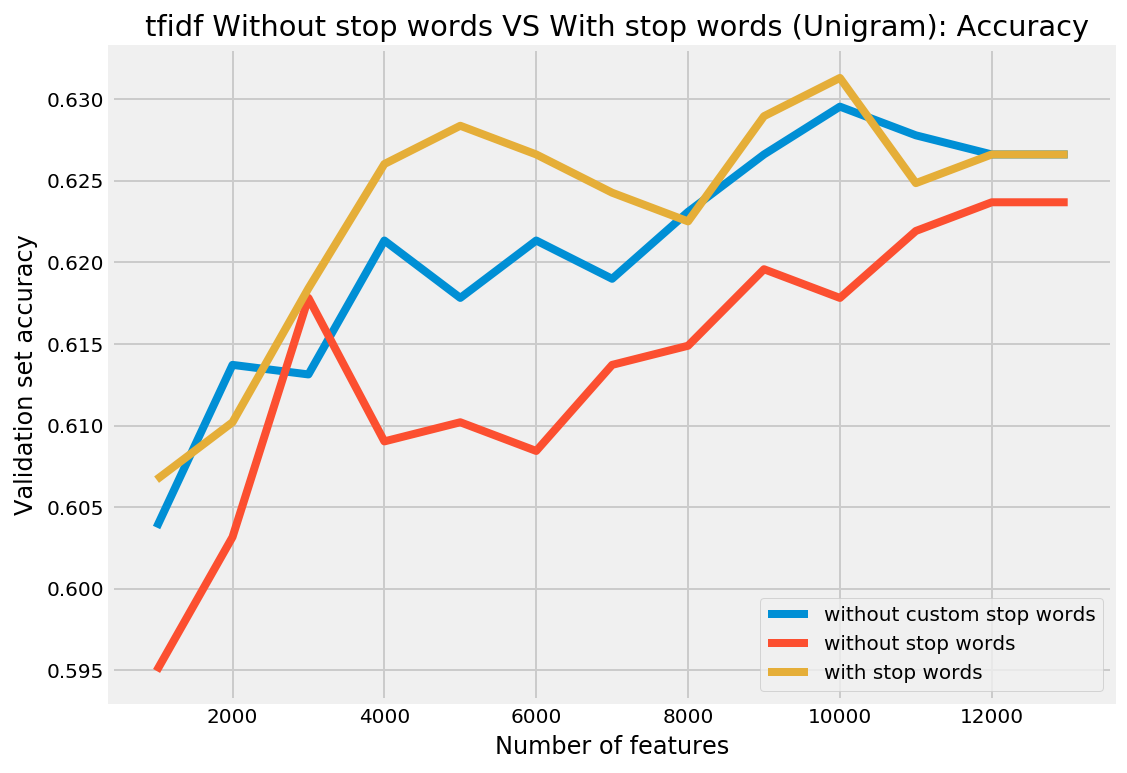

In [84]:
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ugt2 = pd.DataFrame(feature_result_ugt2,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ugt3 = pd.DataFrame(feature_result_ugt3,columns=['nfeatures','validation_accuracy'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='without custom stop words')
plt.plot(nfeatures_plot_ugt2.nfeatures, nfeatures_plot_ugt2.validation_accuracy,label='without stop words')
plt.plot(nfeatures_plot_ugt3.nfeatures, nfeatures_plot_ugt3.validation_accuracy,label='with stop words')
plt.title(" tfidf Without stop words VS With stop words (Unigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [85]:
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bgt2 = pd.DataFrame(feature_result_bgt2,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bgt3 = pd.DataFrame(feature_result_bgt3,columns=['nfeatures','validation_accuracy'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy, label='without custom stop words')
plt.plot(nfeatures_plot_bgt2.nfeatures, nfeatures_plot_bgt2.validation_accuracy,label='without stop words')
plt.plot(nfeatures_plot_bgt3.nfeatures, nfeatures_plot_bgt3.validation_accuracy,label='with stop words')
plt.title(" tfidf Without stop words VS With stop words (Bigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

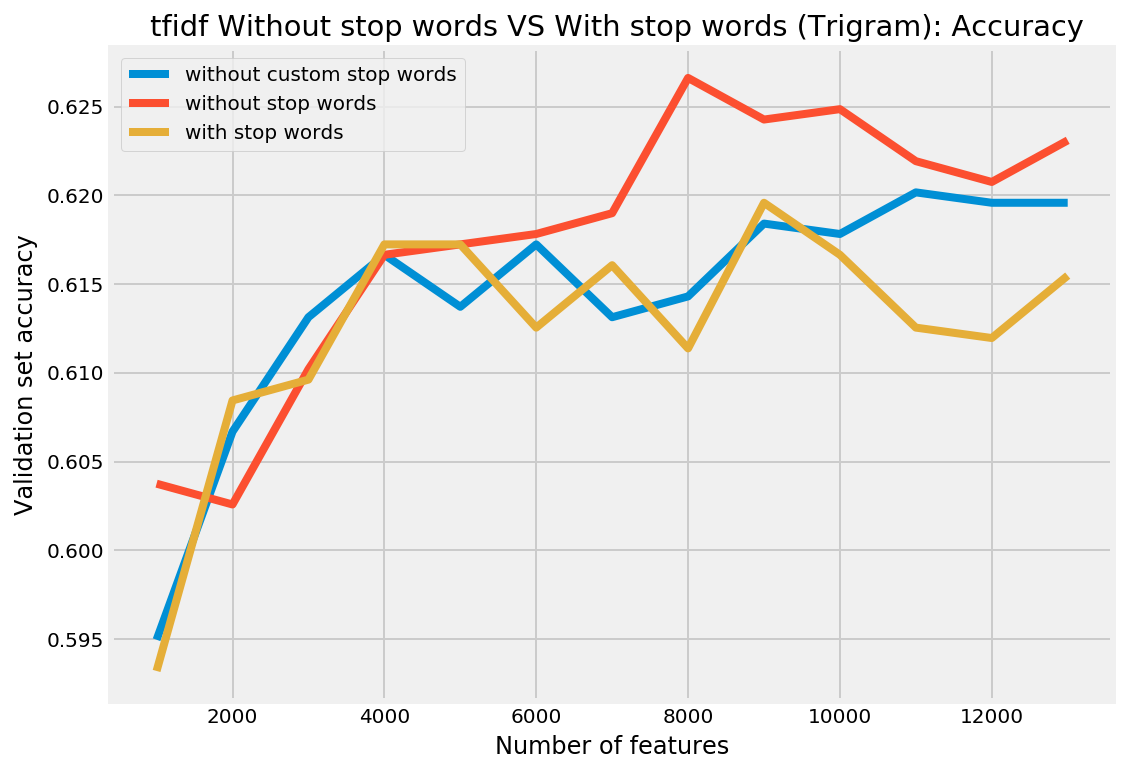

In [86]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_tgt2 = pd.DataFrame(feature_result_tgt2,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_tgt3 = pd.DataFrame(feature_result_tgt3,columns=['nfeatures','validation_accuracy'])
plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy, label='without custom stop words')
plt.plot(nfeatures_plot_tgt2.nfeatures, nfeatures_plot_tgt2.validation_accuracy,label='without stop words')
plt.plot(nfeatures_plot_tgt3.nfeatures, nfeatures_plot_tgt3.validation_accuracy,label='with stop words')
plt.title(" tfidf Without stop words VS With stop words (Trigram): Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [87]:
nfeatures_plot_tgt2 = pd.DataFrame(feature_result_tgt2,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bgt2 = pd.DataFrame(feature_result_bgt2,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ugt2 = pd.DataFrame(feature_result_ugt2,columns=['nfeatures','validation_accuracy'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt2.nfeatures, nfeatures_plot_tgt2.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg2.nfeatures, nfeatures_plot_tg2.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt2.nfeatures, nfeatures_plot_bgt2.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg2.nfeatures, nfeatures_plot_bg2.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt2.nfeatures, nfeatures_plot_ugt2.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug_wosw.nfeatures, nfeatures_plot_ug_wosw.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title(" Without using stop words N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

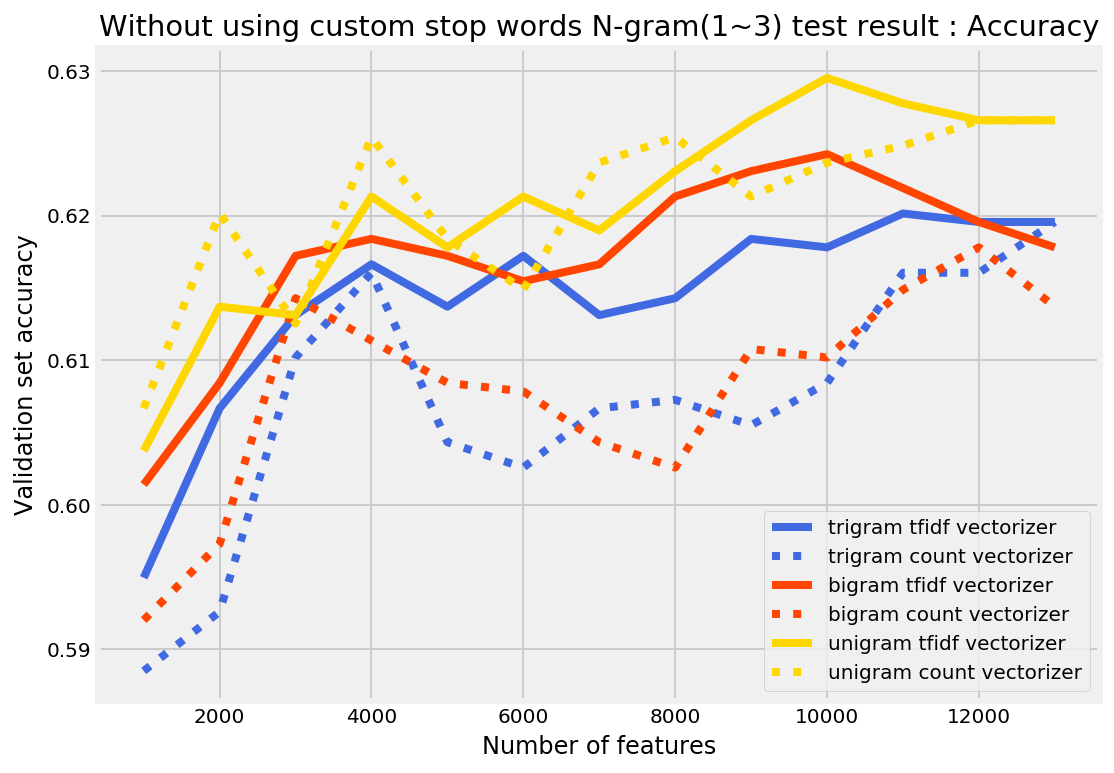

In [88]:
nfeatures_plot_tgt = pd.DataFrame(feature_result_tgt,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bgt = pd.DataFrame(feature_result_bgt,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ugt = pd.DataFrame(feature_result_ugt,columns=['nfeatures','validation_accuracy'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt.nfeatures, nfeatures_plot_tgt.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt.nfeatures, nfeatures_plot_bgt.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt.nfeatures, nfeatures_plot_ugt.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug_wocsw.nfeatures, nfeatures_plot_ug_wocsw.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("Without using custom stop words N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

In [89]:
feature_result_bg3 = nfeature_accuracy_checker(ngram_range=(1, 2))
feature_result_tg3 = nfeature_accuracy_checker(ngram_range=(1, 3))

LogisticRegression(max_iter=200)


Validation result for 1000 features
null accuracy: 50.00%
accuracy score: 58.56%
model is 8.56% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 2000 features
null accuracy: 50.00%
accuracy score: 59.20%
model is 9.20% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 3000 features
null accuracy: 50.00%
accuracy score: 60.38%
model is 10.38% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 4000 features
null accuracy: 50.00%
accuracy score: 60.61%
model is 10.61% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for 5000 features
null accuracy: 50.00%
accuracy score: 61.25%
model is 11.25% more accurate than null ac

In [90]:
nfeatures_plot_tgt3 = pd.DataFrame(feature_result_tgt3,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bgt3 = pd.DataFrame(feature_result_bgt3,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_ugt3= pd.DataFrame(feature_result_ugt3,columns=['nfeatures','validation_accuracy'])

nfeatures_plot_tg3 = pd.DataFrame(feature_result_tg3,columns=['nfeatures','validation_accuracy'])
nfeatures_plot_bg3 = pd.DataFrame(feature_result_bg3,columns=['nfeatures','validation_accuracy'])

plt.figure(figsize=(8,6))
plt.plot(nfeatures_plot_tgt3.nfeatures, nfeatures_plot_tgt3.validation_accuracy,label='trigram tfidf vectorizer',color='royalblue')
plt.plot(nfeatures_plot_tg3.nfeatures, nfeatures_plot_tg3.validation_accuracy,label='trigram count vectorizer',linestyle=':', color='royalblue')
plt.plot(nfeatures_plot_bgt3.nfeatures, nfeatures_plot_bgt3.validation_accuracy,label='bigram tfidf vectorizer',color='orangered')
plt.plot(nfeatures_plot_bg3.nfeatures, nfeatures_plot_bg3.validation_accuracy,label='bigram count vectorizer',linestyle=':',color='orangered')
plt.plot(nfeatures_plot_ugt3.nfeatures, nfeatures_plot_ugt3.validation_accuracy, label='unigram tfidf vectorizer',color='gold')
plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram count vectorizer',linestyle=':',color='gold')
plt.title("Using stop words N-gram(1~3) test result : Accuracy")
plt.xlabel("Number of features")
plt.ylabel("Validation set accuracy")
plt.legend()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [91]:
def accuracy_summary2(pipeline, x_train, y_train, x_test, y_test):
    if y_val_len0 / (len(x_test)*1.) > 0.5:
        null_accuracy =  y_val_len1/ (len(x_test)*1.)
    else:
        null_accuracy = 1. - (y_val_len1 / (len(x_test)*1.))
    #t0 = time.time()
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    #train_test_time = time() - t0
    accuracy = accuracy_score(y_test, y_pred)
    print ("null accuracy: {0:.2f}%".format(null_accuracy*100))
    print ("accuracy score: {0:.2f}%".format(accuracy*100))
    if accuracy > null_accuracy:
        print ("model is {0:.2f}% more accurate than null accuracy".format((accuracy-null_accuracy)*100))
    elif accuracy == null_accuracy:
        print ("model has the same accuracy with the null accuracy")
    else:
        print ("model is {0:.2f}% less accurate than null accuracy".format((null_accuracy-accuracy)*100))
    #print ("train and test time: {0:.2f}s".format(train_test_time))
    print ("-"*80)
    return accuracy, sentiment_fit

In [93]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression

clf1 = LogisticRegression()
clf2 = LinearSVC()
clf3 = MultinomialNB()
clf4 = RidgeClassifier()
clf5 = PassiveAggressiveClassifier()

eclf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('mnb', clf3), ('rcs', clf4), ('pac', clf5)], voting='hard')

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Logistic Regression', 'Linear SVC', 'Multinomial NB', 'Ridge Classifier', 'Passive Aggresive Classifier', 'Ensemble']):
    checker_pipeline = Pipeline([
            ('vectorizer', TfidfVectorizer(stop_words = 'english',max_features=8000,ngram_range=(1, 3))),
            ('classifier', clf)
        ])
    print ("Validation result for {}".format(label))
    print (clf)
    clf_accuracy, model = accuracy_summary2(checker_pipeline, x_train, y_train, x_validation, y_validation)

Validation result for Logistic Regression
LogisticRegression()
null accuracy: 50.00%
accuracy score: 62.66%
model is 12.66% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for Linear SVC
LinearSVC()
null accuracy: 50.00%
accuracy score: 61.20%
model is 11.20% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for Multinomial NB
MultinomialNB()
null accuracy: 50.00%
accuracy score: 62.02%
model is 12.02% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for Ridge Classifier
RidgeClassifier()
null accuracy: 50.00%
accuracy score: 61.78%
model is 11.78% more accurate than null accuracy
--------------------------------------------------------------------------------
Validation result for Passive Aggresive Classifier
PassiveAggressiveClassifier()
n